<a href="https://colab.research.google.com/github/hmm0403/TIL/blob/main/RDA_DDal_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
df = pd.read_csv("fruitData_netDB.csv")
df.head()

,datetime,sample,flowerNumber,harvFruitNumber,fruitDiameter,fruit_width,weight,yield,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2018-04-11,1,1,1,30.38,37.62,21.22,NaN,NaN,NaN,NaN,NaN
1,2018-04-19,1,2,1,51.05,66.02,122.82,NaN,NaN,NaN,NaN,NaN
2,2018-04-19,1,3,1,54.70,79.21,199.62,NaN,NaN,NaN,NaN,NaN
3,2018-04-19,1,1,1,27.64,28.60,12.81,NaN,NaN,NaN,NaN,NaN
4,2018-04-25,1,2,1,48.87,61.59,98.36,NaN,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         736 non-null    object 
 1   sample           736 non-null    int64  
 2   flowerNumber     736 non-null    int64  
 3   harvFruitNumber  736 non-null    int64  
 4   fruitDiameter    736 non-null    float64
 5   fruit_width      736 non-null    float64
 6   weight           736 non-null    float64
 7   yield            24 non-null     float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
dtypes: float64(8), int64(3), object(1)
memory usage: 69.1+ KB


In [33]:
from sklearn.model_selection import train_test_split
x = df[['fruitDiameter', 'fruit_width']]
y = df[['weight']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [35]:
my_apartment = [[1, 1]]
my_predict = mlr.predict(my_apartment)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [36]:
y_predict = mlr.predict(x_test)

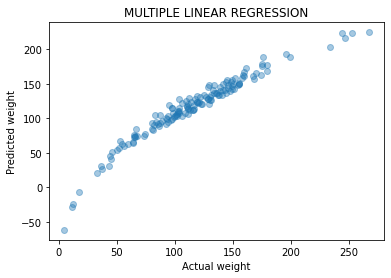

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual weight")
plt.ylabel("Predicted weight")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [42]:
print(mlr.coef_)
print('가중치 a : ', mlr.coef_)
print('y절편 : ', mlr.intercept_)

[[0.4410644  4.08117617]]
가중치 a :  [[0.4410644  4.08117617]]
y절편 :  [-158.41782643]


In [43]:
#결정계수
relation_square = mlr.score(x, y)
print('결정계수 : ', relation_square)

결정계수 :  0.940261728790255


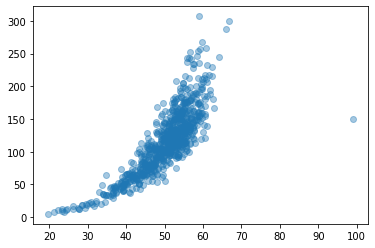

In [39]:
plt.scatter(df[['fruitDiameter']], df[['weight']], alpha=0.4)
plt.show()

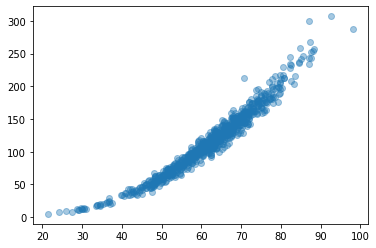

In [40]:
plt.scatter(df[['fruit_width']], df[['weight']], alpha=0.4)
plt.show()

In [41]:
((y - y.mean()) ** 2).sum()

weight    1.866478e+06
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


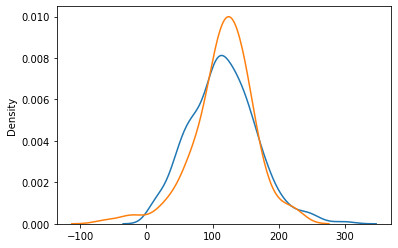

In [47]:

import matplotlib.pyplot as plot
import seaborn as sns
ax1 = sns.distplot(y, hist = False, label = 'y실제')
ax2 = sns.distplot(y_predict, hist = False, label = 'y예측')
plot.show()